<a href="https://colab.research.google.com/github/JeanJulesBigeard/Getting-started-with-OpenCV/blob/master/Text_Detection/7_Text_Recognition_with_Keras_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue">OCR pipeline with Keras-OCR library</font>
## <font color="blue">What is Keras-ocr?</font>
Keras-ocr is a python package for performing OCR. It implements a Text Detection -> Text Recognition pipeline where Text Detection is done using the CRAFT algorithm published in CVPR-2019 and Text Recognition is done using the [CRNN algorithm](https://arxiv.org/abs/1507.05717) which was published in TPAMI-2017.

It is released under the MIT license making it a free software. While there are many text detection papers which provide code and models, it is sometimes difficult to make them work. The good thing about Keras-ocr is that it is also available as a [pypi package](https://pypi.org/project/keras-ocr/) making it easy to install and use. Moreover, it supports GPUs when available.

Moreover, the library has quite a few utility functions which help in OCR related tasks. For example, it has functionality for generating bounding boxes, aligning them, annotating images with bounding boxes and text etc.

We had discussed the Text Detection process using CRAFT in the previous notebook. In this notebook, we will discuss the various methods available in keras-ocr to perform Text Recognition.

# <font color="blue">1. Install Keras-OCR package</font>

In [0]:
!pip install keras-ocr > /dev/null

# <font color="blue">2. Import Libraries</font>

In [0]:
import keras_ocr
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# <font color="blue">3. Download Sample Image</font>

In [0]:
!wget https://www.dropbox.com/s/vxme4py1pq0omeq/dlbook.jpg?dl=1 -O dlbook.jpg --quiet

### <font color="green">Downloaded Image</font>
<img src="https://www.dropbox.com/s/vxme4py1pq0omeq/dlbook.jpg?dl=1" width=300>

In [0]:
image = keras_ocr.tools.read("dlbook.jpg")

# <font color="blue">4. Text Recognition using Keras OCR</font>
The library provides a simple interface for recognizing text.There are 3 options:
1. pipeline for detecting and recognizing text ( just like we implemented the function **`modified_tesseract`** in the last notebook).
1. Recognize text from an image assuming a single text box is present in the image.
1. Recognize text from an image with text bounding boxes for each text box obtained by first passing it through the text detector ( e.g. CRAFT )


# <font color="blue">5. Text Recognition using the Pipeline class</font>

## <font color="blue">5.1. Create a pipeline Object</font>
You simply create an instance of the pipeline class using the below method.

It will download the text detection model ( CRAFT ) and the text recognition model ( CRNN ) if they are not already present.

In [0]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


## <font color="blue">5.2. Perform OCR</font>
For doing OCR, just call the method **`recognize`** with a list of input images and it returns the text along with the bounding box for each detected text.

NOTE: Since the function expects a list, we are first adding the image to the list and then passing it to the function.

In [0]:
prediction_groups = pipeline.recognize([image])

Let us see what the output looks like:

In [0]:
print(prediction_groups)

[[('learning', array([[158.,  64.],
       [318.,  64.],
       [318.,  94.],
       [158.,  94.]], dtype=float32)), ('deep', array([[ 66.,  66.],
       [148.,  66.],
       [148.,  94.],
       [ 66.,  94.]], dtype=float32)), ('goodfellw', array([[ 90.,  98.],
       [168.,  98.],
       [168., 112.],
       [ 90., 112.]], dtype=float32)), ('loshua', array([[172.,  98.],
       [216.,  98.],
       [216., 112.],
       [172., 112.]], dtype=float32)), ('bengio', array([[218.,  98.],
       [268.,  98.],
       [268., 114.],
       [218., 114.]], dtype=float32)), ('lan', array([[ 66., 100.],
       [ 88., 100.],
       [ 88., 112.],
       [ 66., 112.]], dtype=float32)), ('aaron', array([[ 94., 114.],
       [134., 114.],
       [134., 128.],
       [ 94., 128.]], dtype=float32)), ('courville', array([[136., 114.],
       [194., 114.],
       [194., 128.],
       [136., 128.]], dtype=float32)), ('and', array([[ 66., 116.],
       [ 92., 116.],
       [ 92., 128.],
       [ 66., 128.]],

## <font color="blue">5.3. Decode Output</font>
So, the output is a list of list of tuples, where:
- the tuples contain the prediction for each detected text.
- the inner list contains all such detections
- the outer list contains all predictions for the list of images we supplied. Since we supplied only a single image, it gives only 1 element in the outer list.

Let us have a look at the output of the image we supplied:

In [0]:
predictions = prediction_groups[0]

Let us examine the output for a single tuple (i.e. a single detected text box )

In [0]:
print(predictions[0])

('deep', array([[ 66.,  66.],
       [146.,  66.],
       [146.,  92.],
       [ 66.,  92.]], dtype=float32))


It gives:
- the detected text and 
- the coordinates of the four corners in a clockwise manner starting from **`top-left`** and ending at **`bottom-left`**

## <font color="blue">5.4. Display Output</font>

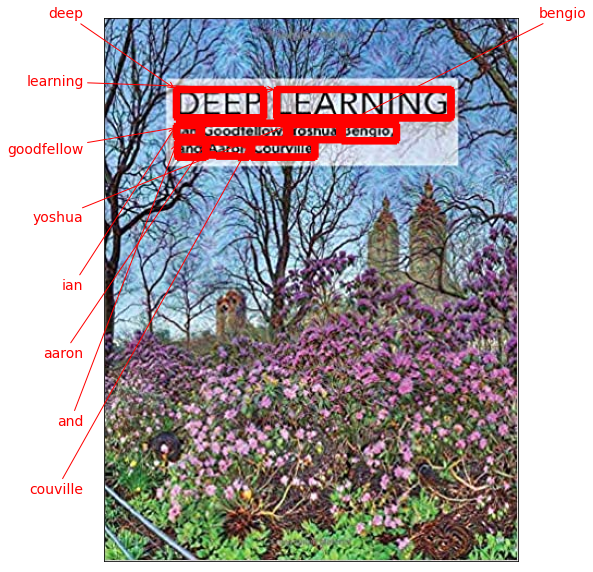

In [0]:
fig,ax = plt.subplots(figsize = [10,10])
keras_ocr.tools.drawAnnotations(image, predictions, ax=ax)

# <font color="blue">6. Text Recognition using cropped Text image</font>
This option is suitable if you have the cropped images containing text in separate files. The use case for this option is limited and we will not be using this method in most cases.

We will use a cropped image of text for this example.

## <font color="blue">6.1. Create a Recognizer Object</font>

In [0]:
recognizer = keras_ocr.recognition.Recognizer()

Looking for /root/.keras-ocr/crnn_kurapan.h5


## <font color="blue">6.2. Perform OCR on Cropped Text</font>

In [0]:
!wget https://www.dropbox.com/s/pbfcc02azekx4kq/streetsign1_crop1.jpg?dl=0 -O ss1_crop1.jpg --quiet

### <font color="green">Downloaded Image</font>
<img src="https://www.dropbox.com/s/pbfcc02azekx4kq/streetsign1_crop1.jpg?dl=1" >

In [0]:
image = keras_ocr.tools.read("ss1_crop1.jpg")

In [0]:
recognitions = recognizer.recognize(image)

In [0]:
print(recognitions)

brodway


So, the predicted text is incorrect!
Let us try with an aligned image

## <font color="blue">6.3. Perform OCR on Cropped and Aligned Text</font>

In [0]:
!wget https://www.dropbox.com/s/2y0mhmfnyvvz9tf/streetsign1_crop1_aligned.png?dl=0 -O crop1_aligned.png --quiet

### <font color="green">Downloaded Image</font>
<img src="https://www.dropbox.com/s/2y0mhmfnyvvz9tf/streetsign1_crop1_aligned.png?dl=1">

In [0]:
image = keras_ocr.tools.read("crop1_aligned.png")

In [0]:
recognitions = recognizer.recognize(image)

In [0]:
print(recognitions)

broadway


## <font color="blue">6.4. OCR on full image (without cropping)</font>
Just to be clear, this method will not work if you do not provide cropped and aligned images. Let us use the same book image for example

In [0]:
image = keras_ocr.tools.read("dlbook.jpg")

In [0]:
recognitions = recognizer.recognize(image)

In [0]:
print(recognitions)

ss


# <font color="blue">7. Text Recognition using detected Text Boxes</font>
The is a really useful method which gives you the flexibility to use the text detector and text recognizer separately. So, you can plug in a different detector/recognizer and use the inbuilt recognizer/detector along with all other functionalities of the library.

Note that the function **`recognize_from_boxes` function also aligns the text boxes**.


## <font color="blue">7.1. Create Detector and Recognizer Objects</font>
You can create a detector and recognizer objects using the following functions. Check out the [documentation](https://keras-ocr.readthedocs.io/en/latest/api.html) if you need more details.

In [0]:
detector = keras_ocr.detection.Detector()
recognizer = keras_ocr.recognition.Recognizer()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


## <font color="blue">7.2. Detect Text Boxes</font>

In [0]:
image = keras_ocr.tools.read("dlbook.jpg")
detections = detector.detect([image])

## <font color="blue">7.3. Display Detected Text Boxes</font>

In [0]:
def display_boxes(image, boxes):
  img = keras_ocr.tools.drawBoxes(image.copy(),boxes)
  plt.figure(figsize=[10,10])
  plt.imshow(img)
  plt.show()

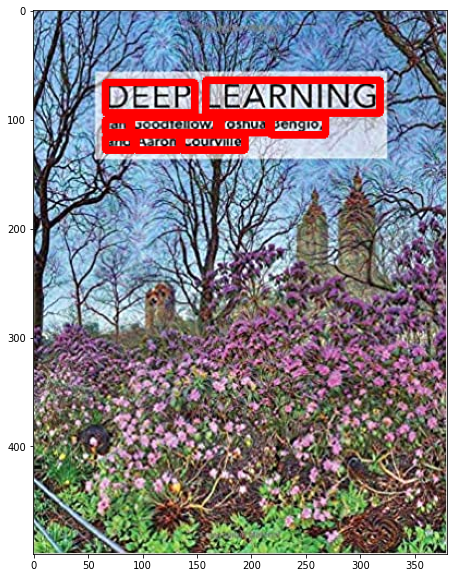

In [0]:
display_boxes(image,detections[0])

## <font color="blue">7.4. Recognize Detected Text</font>
We are using the detected text boxes from above to pass it to the Recognizer Engine

If the text is recognized, we add the text and box information in a list which is then returned.

In [0]:
recognitions = recognizer.recognize_from_boxes([image],detections)

In [0]:
print(recognitions)

[['learning', 'deep', 'goodfellw', 'loshua', 'bengio', 'lan', 'aaron', 'courville', 'and']]


## <font color="blue">7.5. Display Output </font>
We will use the nice function drawAnnotations available in keras-ocr to display the recognized text as shown below.

### <font color="green">Create a list containing text and text boxes</font>

In [0]:
predictions = list(zip(recognitions[0],detections[0]))

In [0]:
print(predictions)

[('learning', array([[158.,  64.],
       [318.,  64.],
       [318.,  94.],
       [158.,  94.]], dtype=float32)), ('deep', array([[ 66.,  66.],
       [148.,  66.],
       [148.,  94.],
       [ 66.,  94.]], dtype=float32)), ('goodfellw', array([[ 90.,  98.],
       [168.,  98.],
       [168., 112.],
       [ 90., 112.]], dtype=float32)), ('loshua', array([[172.,  98.],
       [216.,  98.],
       [216., 112.],
       [172., 112.]], dtype=float32)), ('bengio', array([[218.,  98.],
       [268.,  98.],
       [268., 114.],
       [218., 114.]], dtype=float32)), ('lan', array([[ 66., 100.],
       [ 88., 100.],
       [ 88., 112.],
       [ 66., 112.]], dtype=float32)), ('aaron', array([[ 94., 114.],
       [134., 114.],
       [134., 128.],
       [ 94., 128.]], dtype=float32)), ('courville', array([[136., 114.],
       [194., 114.],
       [194., 128.],
       [136., 128.]], dtype=float32)), ('and', array([[ 66., 116.],
       [ 92., 116.],
       [ 92., 128.],
       [ 66., 128.]], 

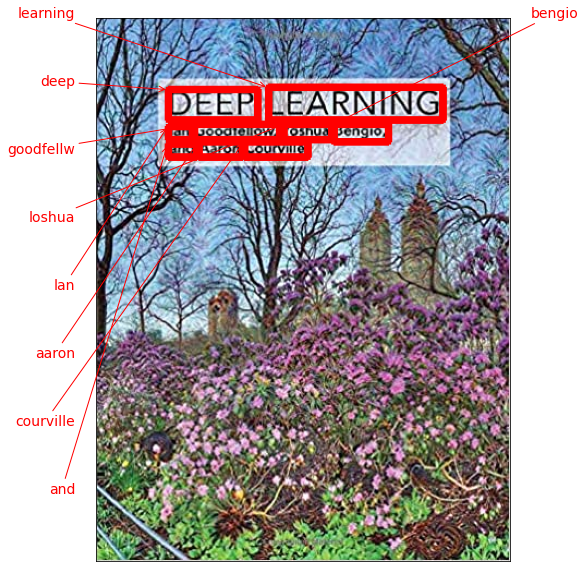

In [0]:
fig,ax = plt.subplots(figsize = [10,10])
keras_ocr.tools.drawAnnotations(image, predictions, ax=ax)

# <font color="blue">Conclusion</font>
1. We can see that the accuracy of Option 1: Using pipeline is better than the Option 3 discussed above. This is simply because in the code, it scales the input image by 2 before processing the image. You should try using **`keras_ocr.pipeline.Pipeline(scale=1)`** and you will see that you get exactly the same output as in Option 3. [Check out the code here](https://github.com/faustomorales/keras-ocr/blob/master/keras_ocr/pipeline.py)
1. If you compare the output with that of tesseract, you will notice that the accuracy of this pipeline is much better than that of the modified tesseract pipelin we build in the previous notebook. However, you should also note that Tesseract was able to correctly identify the Capitalized letter ( for example DEEP, LEARNING, Bengio etc. ) But, this approach doesn't distinguish between capitalized and normal letters.